
# AAI612: Deep Learning & its Applications


*Notebook 2.2: Pandas*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week2/Notebook2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Manipulation with Pandas

Let us recap what we did so far in this module by looking at Pandas.  Recall that ``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

## Using Pandas

Installation of Pandas on your system requires NumPy.
Details on this installation can be found in the [Pandas documentation](http://pandas.pydata.org/).

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [1]:
import pandas as pd

This import convention will be used throughout the remainder of this book.

# Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [2]:
import numpy as np

### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

#### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [9]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [11]:
data[5]

0.5

#### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [13]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [14]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

We'll discuss some of the quirks of Pandas indexing and slicing in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

#### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [15]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [16]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

### The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

#### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [19]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [20]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [21]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [22]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [23]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [24]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

#### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [25]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

#### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

##### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [26]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


##### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [27]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [28]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [29]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


##### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [30]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.561527,0.656912
b,0.253787,0.278065
c,0.041068,0.493250


##### From a NumPy structured array

We covered structured arrays in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [31]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [32]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [33]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [34]:
ind[1]

3

In [35]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [36]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means.  The following should cause an error:

In [37]:
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

## Reading Data from Files

Let us start by reading some simple data from a simple file, scientists.csv:

In [38]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
scientists = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI612/main/Week2/data/scientists.csv', sep=',') # sep=',' is the default

In [39]:
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [40]:
scientists.describe()

,Age
count,8.000000
mean,59.125000
std,18.325918
min,37.000000
25%,44.000000
50%,58.500000
75%,68.750000
max,90.000000


Let us drop some columns

In [41]:
scientists = scientists.drop(['Born', 'Died'], axis=1)

In [42]:
scientists

,Name,Age,Occupation
0,Rosaline Franklin,37,Chemist
1,William Gosset,61,Statistician
2,Florence Nightingale,90,Nurse
3,Marie Curie,66,Chemist
4,Rachel Carson,56,Biologist
5,John Snow,45,Physician
6,Alan Turing,41,Computer Scientist
7,Johann Gauss,77,Mathematician


Select one column:

In [43]:
ages = scientists.Age

In [44]:
ages.min()

37

Select some ranges:

In [45]:
ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [46]:
ages[(ages > ages.mean()) & (ages > 75)]

2    90
7    77
Name: Age, dtype: int64

In [47]:
ages[(ages > ages.mean()) & ~(ages > 75)]

1    61
3    66
Name: Age, dtype: int64

In [48]:
scientists[scientists['Age'] > scientists['Age'].mean()]

,Name,Age,Occupation
1,William Gosset,61,Statistician
2,Florence Nightingale,90,Nurse
3,Marie Curie,66,Chemist
7,Johann Gauss,77,Mathematician


Let us switch gear to a new dataset, the Pokemon dataset. Recall that the dataset includes information on all Pokemons including:

- **name**: The English name of the Pokemon
- **name2**: The English name of the Pokemon
- **Primary type**: The Primary Type of the Pokemon
- **Secondary type**: The Secondary Type of the Pokemon
- **hp**: The Hit Points of the Pokemon
- **attack**: The Attack of the Pokemon
- **defense**: The Defense of the Pokemon
- **spattack**: The Special Attack of the Pokemon 
- **spdefense**: The Special Defense of the Pokemon
- **speed**: The Speed of the Pokemon 

Now, let us move to another dataset, Pokemon!

In [49]:
import pandas as pd 

pokemon = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI612/main/Week2/data/pokemons.csv?raw=true",encoding = "ISO-8859-1")

In [50]:
pokemon

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
1042,Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500
1043,Calyrex,Ice Rider,PSYCHIC,ICE,165,150,100,85,130,50,680


## Plots

(array([ 18.,  93., 209., 208., 217., 143.,  95.,  38.,  18.,   6.]),
 array([  5. ,  23.5,  42. ,  60.5,  79. ,  97.5, 116. , 134.5, 153. ,
        171.5, 190. ]),
 <BarContainer object of 10 artists>)

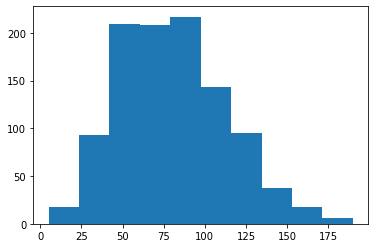

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots()
ax.hist(pokemon['Attack'])

## Some Useful Functions!

In [52]:
pokemon.describe()

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,80.466986,74.661244,70.067943,73.022010,72.288995,68.807656,439.314833
std,32.413665,31.237903,26.671411,32.724797,28.074148,30.210094,121.970701
min,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000,175.000000
25%,55.000000,50.000000,50.000000,50.000000,50.000000,45.000000,330.000000
50%,77.000000,70.000000,68.000000,65.000000,70.000000,65.000000,458.000000
75%,100.000000,90.000000,82.000000,95.000000,90.000000,90.000000,515.000000
max,190.000000,250.000000,255.000000,194.000000,250.000000,200.000000,1125.000000


In [53]:
pokemon['Attack'].describe()

count    1045.000000
mean       80.466986
std        32.413665
min         5.000000
25%        55.000000
50%        77.000000
75%       100.000000
max       190.000000
Name: Attack, dtype: float64

In [54]:
pokemon['Speed'].mean()

68.80765550239235

In [55]:
pokemon['Primary Type'].unique()

array(['GRASS', 'FIRE', 'WATER', 'BUG', 'NORMAL', 'DARK', 'POISON',
       'ELECTRIC', 'GROUND', 'ICE', 'FAIRY', 'STEEL', 'FIGHTING',
       'PSYCHIC', 'ROCK', 'GHOST', 'DRAGON', 'FLYING'], dtype=object)

In [56]:
pokemon.Name.value_counts()

Rotom        6
Necrozma     4
Pumpkaboo    4
Deoxys       4
Oricorio     4
            ..
Whiscash     1
Corphish     1
Crawdaunt    1
Baltoy       1
Hippowdon    1
Name: Name, Length: 897, dtype: int64

We can replicate what value_counts() does by using the groupby() which creates a group of *Names* . Then, for each of these groups, we grab the Name column and count how many times it appears.  value_counts() is just a shortcut to this groupby() operation.

In [57]:
pokemon.groupby('Name').Name.count()

Name
Abomasnow    2
Abra         1
Absol        2
Accelgor     1
Aegislash    2
            ..
Zoroark      1
Zorua        1
Zubat        1
Zweilous     1
Zygarde      3
Name: Name, Length: 897, dtype: int64

We can also use groupby() with other functions such as the min() function:

In [58]:
pokemon.groupby('Name').Defense.min()

Name
Abomasnow    75
Abra         15
Absol        60
Accelgor     40
Aegislash    50
             ..
Zoroark      60
Zorua        40
Zubat        35
Zweilous     70
Zygarde      71
Name: Defense, Length: 897, dtype: int64

or with the max function:

In [59]:
pokemon.groupby('Name').Defense.max()

Name
Abomasnow    105
Abra          15
Absol         60
Accelgor      40
Aegislash    140
            ... 
Zoroark       60
Zorua         40
Zubat         35
Zweilous      70
Zygarde      121
Name: Defense, Length: 897, dtype: int64

Another interesting function is the *agg()*, which allows us to run a bunch of different functions on the DataFrame. For example, we can generate a simple statistical summary of the dataset as follows:

In [60]:
pokemon.groupby(['Name']).Defense.agg([min, max, sum])

,min,max,sum
Name,,,
Abomasnow,75,105,180
Abra,15,15,15
Absol,60,60,120
Accelgor,40,40,40
Aegislash,50,140,190
...,...,...,...
Zoroark,60,60,60
Zorua,40,40,40
Zubat,35,35,35


In [61]:
New_pokemon = pokemon.groupby(['Name', 'Attack','Defense']).Speed.agg([max])
New_pokemon

max
Name      Attack Defense     
Abomasnow 92     75        60
          132    105       30
Abra      20     15        90
Absol     130    60        75
          150    60       115
...                       ...
Zorua     65     40        65
Zubat     45     35        55
Zweilous  85     70        58
Zygarde   100    71       115
                 121       95

[1008 rows x 1 columns]

In [62]:
pokemon.sort_values(by='Name')

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
548,Abomasnow,NaN,GRASS,ICE,92,75,90,92,85,60,494
549,Abomasnow,Mega Abomasnow,GRASS,ICE,132,105,90,132,105,30,594
81,Abra,NaN,PSYCHIC,NaN,20,15,25,105,55,90,310
430,Absol,NaN,DARK,NaN,130,60,65,75,60,75,465
431,Absol,Mega Absol,DARK,NaN,150,60,65,115,60,115,565
...,...,...,...,...,...,...,...,...,...,...,...
54,Zubat,NaN,POISON,FLYING,45,35,40,30,40,55,245
739,Zweilous,NaN,DARK,DRAGON,85,70,72,65,70,58,420
839,Zygarde,50% Forme,DRAGON,GROUND,100,121,108,81,95,95,600
841,Zygarde,Complete Forme,DRAGON,GROUND,100,121,216,91,95,85,708


In [63]:
pokemon.sort_values(by='Name',ascending=False)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
839,Zygarde,50% Forme,DRAGON,GROUND,100,121,108,81,95,95,600
841,Zygarde,Complete Forme,DRAGON,GROUND,100,121,216,91,95,85,708
840,Zygarde,10% Forme,DRAGON,GROUND,100,71,54,61,85,115,486
739,Zweilous,NaN,DARK,DRAGON,85,70,72,65,70,58,420
54,Zubat,NaN,POISON,FLYING,45,35,40,30,40,55,245
...,...,...,...,...,...,...,...,...,...,...,...
431,Absol,Mega Absol,DARK,NaN,150,60,65,115,60,115,565
430,Absol,NaN,DARK,NaN,130,60,65,75,60,75,465
81,Abra,NaN,PSYCHIC,NaN,20,15,25,105,55,90,310
548,Abomasnow,NaN,GRASS,ICE,92,75,90,92,85,60,494


In [64]:
pokemon.sort_values(by=['Name','Name2'],ascending=True)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
549,Abomasnow,Mega Abomasnow,GRASS,ICE,132,105,90,132,105,30,594
548,Abomasnow,NaN,GRASS,ICE,92,75,90,92,85,60,494
81,Abra,NaN,PSYCHIC,NaN,20,15,25,105,55,90,310
431,Absol,Mega Absol,DARK,NaN,150,60,65,115,60,115,565
430,Absol,NaN,DARK,NaN,130,60,65,75,60,75,465
...,...,...,...,...,...,...,...,...,...,...,...
54,Zubat,NaN,POISON,FLYING,45,35,40,30,40,55,245
739,Zweilous,NaN,DARK,DRAGON,85,70,72,65,70,58,420
840,Zygarde,10% Forme,DRAGON,GROUND,100,71,54,61,85,115,486
839,Zygarde,50% Forme,DRAGON,GROUND,100,121,108,81,95,95,600


## Missing Values

In [65]:
pokemon[pd.isnull(pokemon.Name2)]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...
1038,Regieleki,NaN,ELECTRIC,NaN,100,50,80,100,50,200,580
1039,Regidrago,NaN,DRAGON,NaN,100,50,200,100,50,80,580
1040,Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580


In [66]:
pokemon.Name2.fillna("Unknown")

0             Unknown
1             Unknown
2             Unknown
3       Mega Venusaur
4             Unknown
            ...      
1040          Unknown
1041          Unknown
1042          Unknown
1043        Ice Rider
1044     Shadow Rider
Name: Name2, Length: 1045, dtype: object

In [67]:
pokemon.Name.replace("Calyrex", "rCalyrex")

0        Bulbasaur
1          Ivysaur
2         Venusaur
3         Venusaur
4       Charmander
           ...    
1040     Glastrier
1041     Spectrier
1042      rCalyrex
1043      rCalyrex
1044      rCalyrex
Name: Name, Length: 1045, dtype: object